# **Student's Percentage Prediction Model**

## Prediction using Supervised ML


*   Predict the percentage of marks of an student based on the number of
study hours.
*   This is a simple linear regression task as it involves just 2 variables.
*   You can use R, Python, SAS Enterprise Miner or any other tool
*   Data can be found at http://bit.ly/w-data
*   What will be predicted score if a student studies for 9.25 hrs/ day?
*   Sample Solution : https://bit.ly/2HxiGGJ
*   Task submission:
  1. Host the code on GitHub Repository (public). Record the code and output
in a video. Post the video on YouTube
  2. Share links of code (GitHub) and video (YouTube) as a post on YOUR
LinkedIn profile
  3. Submit the LinkedIn link in Task Submission Form when shared with you.


## Importing the Required Libraries

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

**Reading the data**

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
w_data = pd.read_csv(url)
print("Data imported successfully")

w_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot this data that we have on 2-D graph to eyeball our dataset and see if we can manually find any kind of relationship between the two parameters- Hours and Scores.

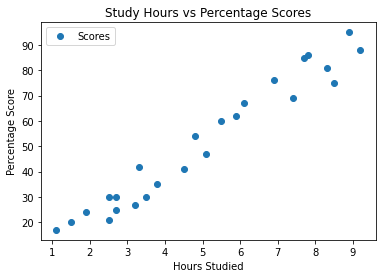

In [3]:
# Plotting the distribution of scores
w_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.**

### Preparing our data 

Next is to define our "attributes"(input) variable and "labels"(output)

In [4]:
X = w_data.iloc[:, :-1].values
y = w_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

### Making the linear regression from scratch

In [6]:
y_train_new = y_train.reshape(-1,1)  
ones = np.ones([X_train.shape[0], 1])
X_train_new = np.concatenate([ones, X_train],1)

In [7]:
# creating the theta matrix
# notice small alpha value
alpha = 0.01
iters = 5000

theta = np.array([[1.0, 1.0]])
print(theta)

[[1. 1.]]


In [8]:
# Cost Function
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [9]:
computeCost(X_train_new, y_train_new, theta)

1398.8529999999998

The value of 1398.8529999999998 is the initial value. The aim will be to minimise this to as small as possible

In [10]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum(((X @ theta.T) - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        #if i % 10 == 0:
            #print(cost)
    return (theta, cost)

In [11]:
g, cost = gradientDescent(X_train_new, y_train_new, theta, alpha, iters)  
print("Intercept -", g[0][0])
print("Coefficient- ", g[0][1])
print("The final cost obtained after optimisation - ", cost)

Intercept - 2.0182067254844513
Coefficient-  9.910649168968112
The final cost obtained after optimisation -  15.449091188857446


**Now Let's Plot our result**

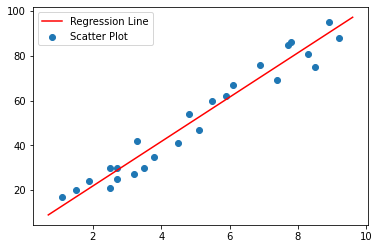

In [12]:
# Plotting scatter points
plt.scatter(X, y, label='Scatter Plot')
axes = plt.gca()

# Plotting the Line
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()

### Using Scikit-Learn library

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [14]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.91065648]
Intercept -  2.018160041434662


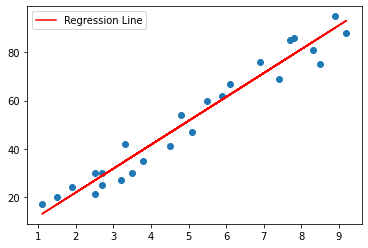

In [15]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

As we can see that both the graph are identical and even the intercepts and coefficient of the line are same. So my effort of making linear regression algorithm from scratch has been a success!!

But as you can see, it is also pretty easy to use the built-in function. Few lines of code and your work is done.Viola!!

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


In [19]:
# Testing with some new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
